In [1]:
import glob
import os
import json
import pickle
import yaml
import math

import uproot

import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import pyarrow.parquet as pq
from sklearn.metrics import auc, roc_curve
from scipy.special import softmax

import hist as hist2
import matplotlib.pyplot as plt
import mplhep as hep

plt.style.use(hep.style.CMS)

import sys
sys.path
sys.path.append("../python/")

import utils

plt.rcParams.update({"font.size": 20})

In [2]:
import uproot

In [17]:
! ls lol/outfiles

0-1.pkl         0-1_ele.parquet 0-1_mu.parquet


In [50]:
df = pd.read_parquet(glob.glob("lol/outfiles/*.parquet"))

from utils import get_finetuned_score
df["THWW"] = get_finetuned_score(df, "../../weaver-core-dev/experiments_finetuning/v35_30/model.onnx")

df = df[df["THWW"]>0.9]

In [51]:
(df["dR_genlep_recolep"].isnull().values).sum()

0

In [52]:
(~df["dR_genlep_recolep"].isnull().values).sum()

12

Text(0, 1, 'TTbar events')

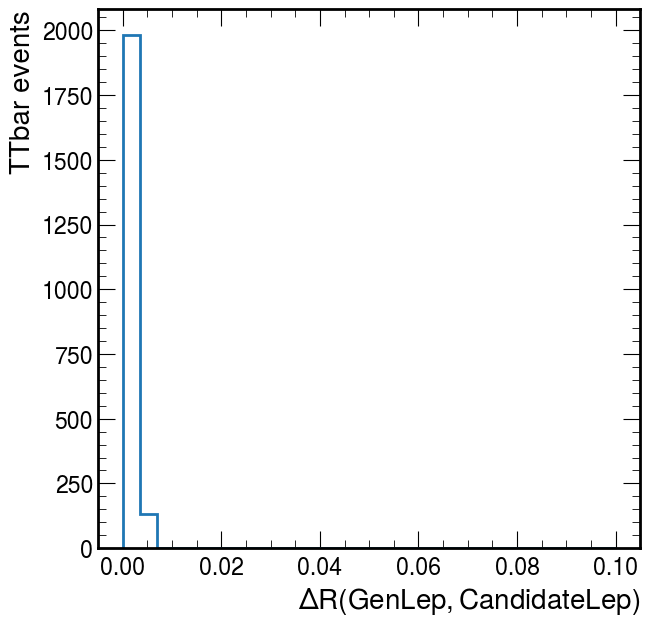

In [40]:
sample = "TTbar"

fig, ax = plt.subplots(figsize=(7,7))

ax.hist(
    df["dR_genlep_recolep"],
    bins=np.linspace(0,0.1,30),
    histtype="step",
    lw=2,
);

# ax.set_yscale("log")

ax.set_xlabel(r"$\Delta R(GenLep,CandidateLep)$")
ax.set_ylabel(f"{sample} events")